___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [179]:
# libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import cufflinks as cf

#Enabling the offline mode for interactive plotting locally
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
import plotly.io as pio
pio.renderers.default = "notebook"

#To display the plots
%matplotlib inline

# sklearn library for machine learning algorithms, data preprocessing, and evaluation
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
# RF model import edilecek
# XGBoost model import edilecek
from sklearn.metrics import classification_report, confusion_matrix, log_loss, recall_score, accuracy_score, precision_score, f1_score

# yellowbrick library for visualizing the model performance
from yellowbrick.classifier import ConfusionMatrix

from sklearn.pipeline import Pipeline

# to get rid of the warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# To display maximum columns
pd.set_option('display.max_columns', None)

# To display maximum rows
pd.set_option('display.max_rows', 200)

pd.set_option('display.float_format', lambda x: '%.2f' % x)

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

primary MOS: A United States military occupation code

In [180]:
df_male =pd.read_csv("ANSUR II MALE Public.csv", encoding="unicode_escape")
df_male.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458

In [181]:
df_male.shape

(4082, 108)

In [182]:
df_female =pd.read_csv("ANSUR II FEMALE Public.csv", encoding="unicode_escape")
df_female.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63

In [183]:
df_female.shape

(1986, 108)

In [184]:
df_female.rename({"SubjectId":"subjectid"}, axis=1, inplace=True)

In [185]:
df_female.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63

In [186]:
df = pd.concat([df_male, df_female], ignore_index=True)

In [187]:
# df.reset_index(inplace=True, drop=True)

In [188]:
df.shape

(6068, 108)

## Explore Data

In [189]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 108 columns):
 #    Column                          Dtype 
---   ------                          ----- 
 0    subjectid                       int64 
 1    abdominalextensiondepthsitting  int64 
 2    acromialheight                  int64 
 3    acromionradialelength           int64 
 4    anklecircumference              int64 
 5    axillaheight                    int64 
 6    balloffootcircumference         int64 
 7    balloffootlength                int64 
 8    biacromialbreadth               int64 
 9    bicepscircumferenceflexed       int64 
 10   bicristalbreadth                int64 
 11   bideltoidbreadth                int64 
 12   bimalleolarbreadth              int64 
 13   bitragionchinarc                int64 
 14   bitragionsubmandibulararc       int64 
 15   bizygomaticbreadth              int64 
 16   buttockcircumference            int64 
 17   buttockdepth                   

In [190]:
df.isnull().sum()

subjectid                            0
abdominalextensiondepthsitting       0
acromialheight                       0
acromionradialelength                0
anklecircumference                   0
axillaheight                         0
balloffootcircumference              0
balloffootlength                     0
biacromialbreadth                    0
bicepscircumferenceflexed            0
bicristalbreadth                     0
bideltoidbreadth                     0
bimalleolarbreadth                   0
bitragionchinarc                     0
bitragionsubmandibulararc            0
bizygomaticbreadth                   0
buttockcircumference                 0
buttockdepth                         0
buttockheight                        0
buttockkneelength                    0
buttockpopliteallength               0
calfcircumference                    0
cervicaleheight                      0
chestbreadth                         0
chestcircumference                   0
chestdepth               

In [191]:
# Drop Ethnicity feature

df.drop(columns="Ethnicity", inplace=True)

In [192]:
df.shape

(6068, 107)

In [193]:
df.duplicated().sum()

0

In [194]:
df.describe()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,SubjectNumericRace,DODRace,Age,Heightin,Weightlbs
count,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00
mean,20757.20,246.47,1406.16,327.37,224.89,1299.61,244.19,194.75,399.20,340.93,274.74,490.75,72.25,324.90,306.64,139.72,1020.08,241.62,870.15,609.00,497.10,386.04,1477.49,282.86,1022.10,251.74,1252.01,825.11,621.85,351.32,35.13,62.63,22.26,240.91,785.91,98.87,263.03,338.77,295.01,552.08,467.01,1102.05,84.95,203.86,189.29,152.18,570.04,196.33,332.62,70.76,348.39,385.73,1040.06,632.60,412.04,432.34,475.51,540.12,483.24,69.58,406.48,119.52,375.44,413.83,1388.40,113.92,416.19,259.19,1129.36,354.08,145.07,898.11,866.67,576.90,1763.79,1714.41,1402.95,1099.59,622.20,176.34,789.70,458.24,129.62,882.74,1630.31,460.52,317.75,914.50,229.67,377.00,1031.50,797.09,169.00,830.06,17.52,1.62,29.76,68.26,174.75
std,13159.39,37.40,79.09,20.72,16.05,72.02,16.85,13.52,30.24,41.52,19.22,42.14,5.34,17.09,20.79,7.31,76.42,26.48,54.82,33.79,29.08,30.65,84.32,20.66,100.67,26.78,79.58,54.75,45.33,29.94,3.23,4.88,3.17,28.51,41.87,6.66,17.39,23.24,30.05,62.37,30.03,68.55,6.35,15.55,11.51,6.24,18.29,8.49,22.46,5.93,25.30,32.40,59.87,36.51,43.07,38.66,33.07,34.20,29.36,7.27,33.23,7.88,39.77,38.16,85.85,7.14,31.27,19.78,92.83,22.60,12.42,45.30,57.52,38.26,110.83,90.02,78.77,60.54,57.75,16.22,53.82,29.76,6.66,54.40,98.62,36.68,36.36,114.27,35.61,31.62,62.70,156.53,13.12,47.65,550.95,0.98,8.67,3.86,33.69
min,10027.00,155.00,1115.00,249.00,156.00,1038.00,186.00,151.00,283.00,216.00,197.00,357.00,55.00,267.00,245.00,116.00,737.00,168.00,656.00,466.00,367.00,266.00,1184.00,213.00,695.00,170.00,984.00,6

In [195]:
df.describe(include="O")

,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,WritingPreference
count,6068,6068,6068,6068,6068,6068,6068,6068
unique,2,253,12,3,3,285,152,3
top,Male,27-Feb-12,Camp Shelby,Regular Army,Combat Service Support,11B,California,Right hand
freq,4082,45,1160,3140,3174,671,446,5350


In [196]:
# features will be dropped

# Date
# Installation
# subjectid

In [197]:
df.drop(columns=["Date","Installation", "subjectid"], inplace=True)

In [198]:
df.shape

(6068, 104)

In [199]:
df[["SubjectNumericRace","DODRace"]].value_counts()

SubjectNumericRace  DODRace
1                   1          3554
2                   2          1025
3                   3           522
31                  3           112
4                   4           108
51                  1            99
8                   2            94
21                  2            51
31                  1            47
6                   6            37
23                  2            26
41                  4            26
28                  2            25
51                  5            24
6                   4            21
41                  1            19
251                 2            18
5                   5            16
61                  1            15
3                   1            13
25                  2            13
18                  1            12
61                  6            12
8                   1            11
                    4            10
21                  1             9
61                  4             8


In [200]:
df[df.SubjectNumericRace != df.DODRace].shape

(806, 104)

In [201]:
(df.SubjectNumericRace > 8).sum()/df.shape[0]

0.1051417270929466

In [202]:
df.SubjectNumericRace.value_counts().sort_index()

1        3561
2        1026
3         541
4         109
5          18
6          59
8         116
18         18
21         60
23         34
25         14
28         26
31        160
35          8
38          9
41         46
42          7
43          5
48          1
51        126
61         35
62          8
63          7
64          8
218         3
231         6
235         4
238         1
251        20
318         2
351        10
358         1
423         2
425         1
428         1
431         2
451         2
631         1
641         2
651         2
2351        2
2518        2
4251        1
42351       1
Name: SubjectNumericRace, dtype: int64

In [203]:
df.DODRace.value_counts()

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64

In [204]:
df[df.SubjectNumericRace == df.DODRace][["SubjectNumericRace","DODRace"]].value_counts()

SubjectNumericRace  DODRace
1                   1          3554
2                   2          1025
3                   3           522
4                   4           108
6                   6            37
5                   5            16
dtype: int64

In [205]:
df.drop(columns="SubjectNumericRace", inplace=True)

In [206]:
df.corr()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,DODRace,Age,Heightin,Weightlbs
abdominalextensiondepthsitting,1.00,0.36,0.32,0.52,0.29,0.46,0.34,0.42,0.69,0.51,0.72,0.37,0.53,0.62,0.50,0.74,0.84,0.26,0.48,0.33,0.66,0.35,0.63,0.83,0.78,0.30,0.20,0.47,0.21,0.25,0.40,0.13,0.26,0.28,0.44,0.35,0.36,0.63,0.73,0.32,0.42,0.43,0.46,0.31,0.34,0.37,0.34,0.51,0.44,0.60,0.56,0.27,0.26,0.60,0.55,0.29,0.36,0.24,0.35,0.67,0.30,0.66,0.63,0.33,0.32,0.16,0.29,0.64,0.30,0.19,0.28,0.43,0.29,0.33,0.32,0.36,0.30,0.73,0.73,0.40,0.28,0.18,0.24,0.73,0.57,0.86,0.94,0.96,0.58,0.16,0.83,0.55,0.39,-0.08,0.38,0.30,0.79
acromialheight,0.36,1.00,0.87,0.51,0.99,0.69,0.80,0.74,0.53,0.41,0.63,0.71,0.57,0.58,0.48,0.30,0.36,0.87,0.82,0.76,0.41,0.98,0.55,0.54,0.29,0.96,0.90,0.35,0.42,0.37,0.43,0.27,0.28,0.81,0.67,0.83,0.85,0.64,0.58,0.87,0.90,0.71,0.72,0.76,0.38,0.44,0.56,0.80,0.45,0.23,0.12,0.93,0.34,0.53,0.60,0.90,0.93,0.86,0.68,0.34,0.54,0.63,0.66,0.87,0.72,0.90,0.83,0.69,0.89,0.54,0.82,0.87,0.88,0.89,0.98,0.99,0.95,0.29,0.46,0.81,0.89,0.32,0.89,0.74,0.73,0.45,0.41,0.37,0.60,0.93,0.68,0.73,0.92,-0.24,0.08,0.94,0.70
acromionradialelength,0.32,0.87,1.00,0.42,0.86,0.61,0.73,0.67,0.46,0.35,0.57,0.62,0.52,0.51,0.43,0.27,0.31,0.82,0.78,0.75,0.36,0.87,0.48,0.48,0.28,0.85,0.86,0.26,0.32,0.32,0.37,0.23,-0.01,0.64,0.58,0.76,0.82,0.56,0.51,0.84,0.82,0.63,0.64,0.73,0.33,0.40,0.50,0.72,0.44,0.20,0.10,0.86,0.34,0.48,0.55,0.84,0.87,0.82,0.56,0.29,0.48,0.55,0.57,0.80,0.67,0.83,0.80,0.63,0.97,0.52,0.65,0.87,0.94,0.90,0.86,0.87,0.85,0.26,0.39,0.81,0.83,0.28,0.84,0.59,0.61,0.38,0.36,0.34,0.48,0.85,0.60,0.65,0.68,-0.20,0.08,0.83,0.62
anklecircumference,0.52,0.51,0.42,1.00,0.47,0.71,0.57,0.54,0.64,0.45,0.65,0.70,0.52,0.53,0.49,0.57,0.59,0.37,0.51,0.34,0.82,0.52,0.56,0.62,0.49,0.49,0.39,0.47,0.39,0.23,0.37,0.23,0.30,0.51,0.65,0.59,0.46,0.67,0.62,0.46,0.52,0.58,0.61,0.46,0.39,0.44,0.45,0.74,0.53,0.47,0.41,0.43,0.24,0.52,0.53,0.42,0.51,0.39,0.49,0.70,0.41,0.58,0.59,0.51,0.46,0.36,0.41,0.63,0.43,0.35,0.52,0.55,0.42,0.47,0.52,0.53,0.45,0.60,0.65,0.47,0.41,0.29,0.38,0.67,0.51,0.59,0.57,0.52,0.48,0.42,0.75,0.70,0.51,-0.16,-0.03,0.50,0.73
axillaheight,0.29,0.99,0.86,0.47,1.00,0.66,0.79,0.71,0.47,0.37,0.57,0.68,0.53,0.52,0.43,0.25,0.30,0.89,0.82,0.77,0.36,0.98,0.48,0.46,0.23,0.96,0.92,0.32,0.41,0.35,0.39,0.25,0.23,0.79,0.63,0.82,0.85,0.58,0.51,0.87,0.89,0.67,0.68,0.76,0.34,0.42,0.54,0.77,0.42,0.19,0.09,0.95,0.33,0.48,0

In [207]:
def check_multicolinarity(data):
    ''' data = numeric list like object or pd.Dataframe'''
    def color_red(val):
        color = ('red' if abs(val) >= 0.9 and val < 1 else 'black')
        return f'color: {color}'

    df = pd.DataFrame(data)
    df_corr = df.corr().applymap(lambda x: x if abs(x)>=0.9 and x<1 else np.NaN).dropna(how='all').dropna(how='all', axis=1)
    
    print(f'Multicolinarity Data', df_corr.shape)
    return df_corr.style.applymap(color_red)

check_multicolinarity(df)

Multicolinarity Data (61, 61)


,abdominalextensiondepthsitting,acromialheight,acromionradialelength,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bideltoidbreadth,buttockcircumference,buttockheight,buttockkneelength,buttockpopliteallength,cervicaleheight,chestcircumference,chestheight,crotchheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,hipbreadth,hipbreadthsitting,iliocristaleheight,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,neckcircumference,neckcircumferencebase,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,tibialheight,trochanterionheight,verticaltrunkcircumferenceusa,waistbreadth,waistcircumference,waistdepth,waistheightomphalion,weightkg,wristcircumference,wristheight,Heightin,Weightlbs
abdominalextensiondepthsitting,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.939899,0.958932,nan,nan,nan,nan,nan,nan
acromialheight,nan,nan,nan,0.987452,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.984230,nan,0.960106,0.901554,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.934169,nan,nan,nan,0.933643,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.980269,0.985013,0.946931,nan,nan,nan,nan,nan,nan,nan,0.933248,nan,nan,0.922687,0.944577,nan
acromionradialelength,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.968584,nan,nan,0.941310,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
axillaheight,nan,0.987452,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.977075,nan,0.957121,0.917346,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.947847,nan,nan,0.905870,0.935335,nan,nan,nan,0.907812,nan,nan,nan,nan,nan,nan,nan,0.975837,0.980930,0.955993,nan,0.906334,0.902156,nan,nan,nan,nan,0.948190,nan,nan,0.905063,0.939310,nan
balloffootcircumference,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.922796,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
balloffootlength,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.960238,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
biacromialbreadth,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.901051,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
bicepscircumferenceflexed,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.914446,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
bideltoidbreadth,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.928673,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.948128,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.906600,nan,nan,nan,nan
buttockcircumference,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.924851,0.900228,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.938459,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [208]:
df.corr()[(abs(df.corr())>= 0.9) & (abs(df.corr()) < 1)].any().any()

True

In [209]:
df.shape

(6068, 103)

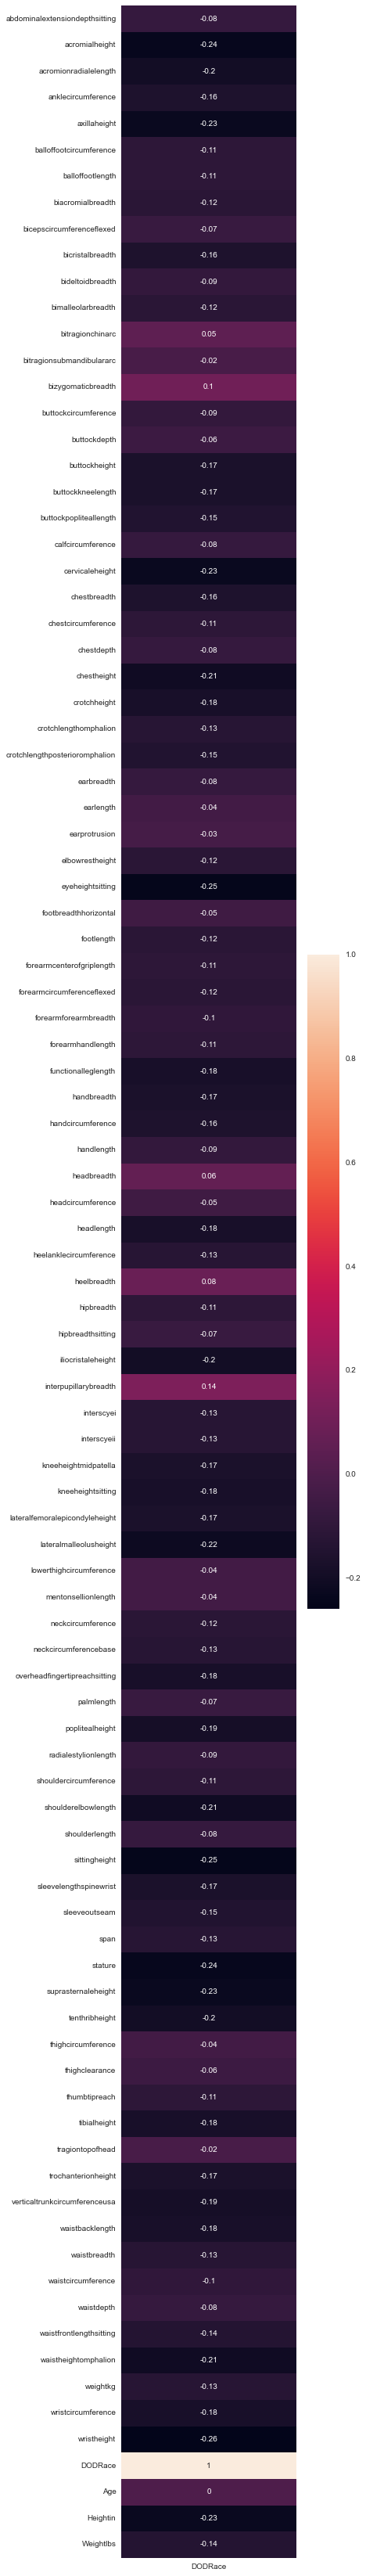

In [210]:
plt.figure(figsize=(5,60))
corr = df.corr()[['DODRace']]
sns.heatmap(corr.round(2), annot=True);

In [211]:
df_numeric = df.select_dtypes('number')
df_object = df.select_dtypes('O')

df_numeric.shape, df_object.shape

((6068, 97), (6068, 6))

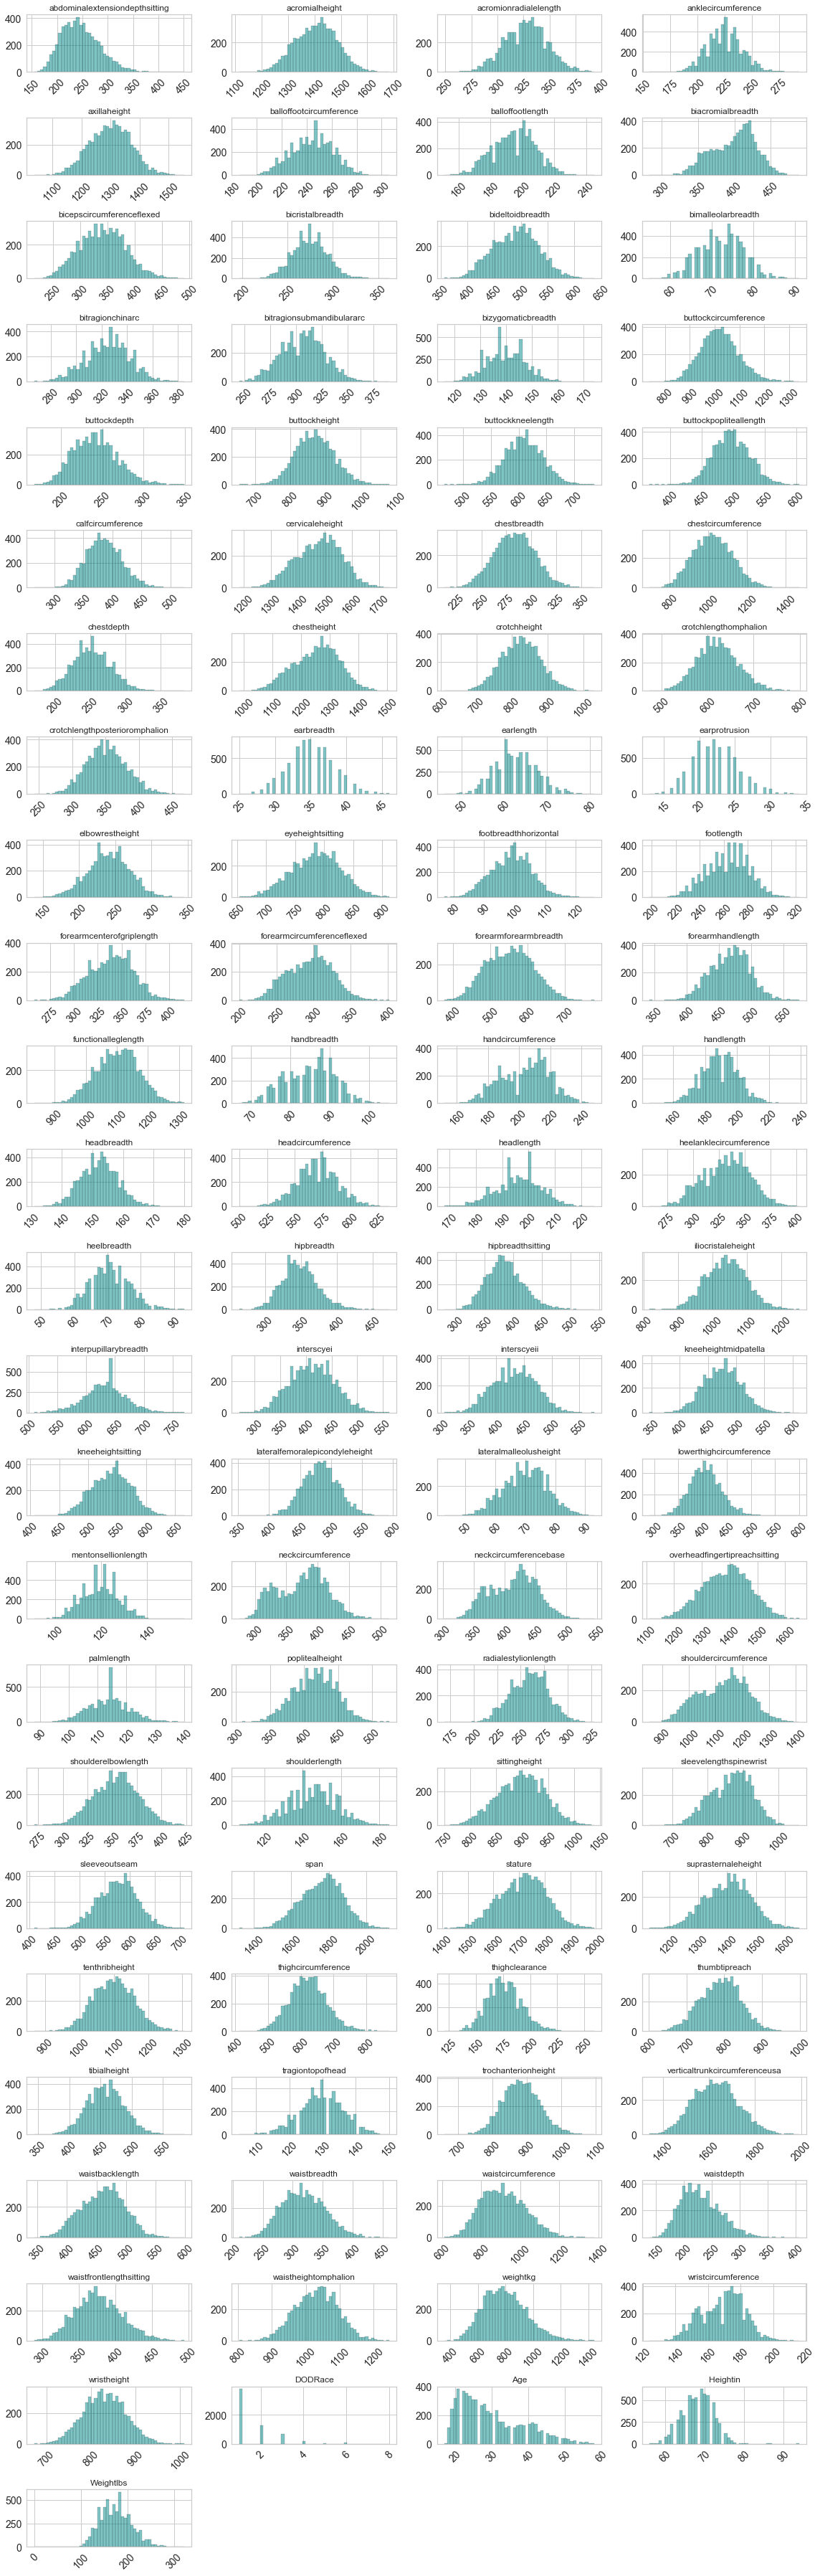

In [212]:
#histplot için:
fig = df_numeric.hist(
figsize=(16, 50), layout=(int(np.ceil(len(df_numeric.columns)/4)), 4),
bins=50, color="darkcyan", 
edgecolor="black", 
xlabelsize=14, ylabelsize=14, 
alpha=0.5, xrot=45
)
plt.tight_layout()
plt.show()

In [213]:
# fig_ = df_numeric.hist(figsize=(16, 100), layout=(55,2), bins=30, edgecolor="black")
# plt.tight_layout();

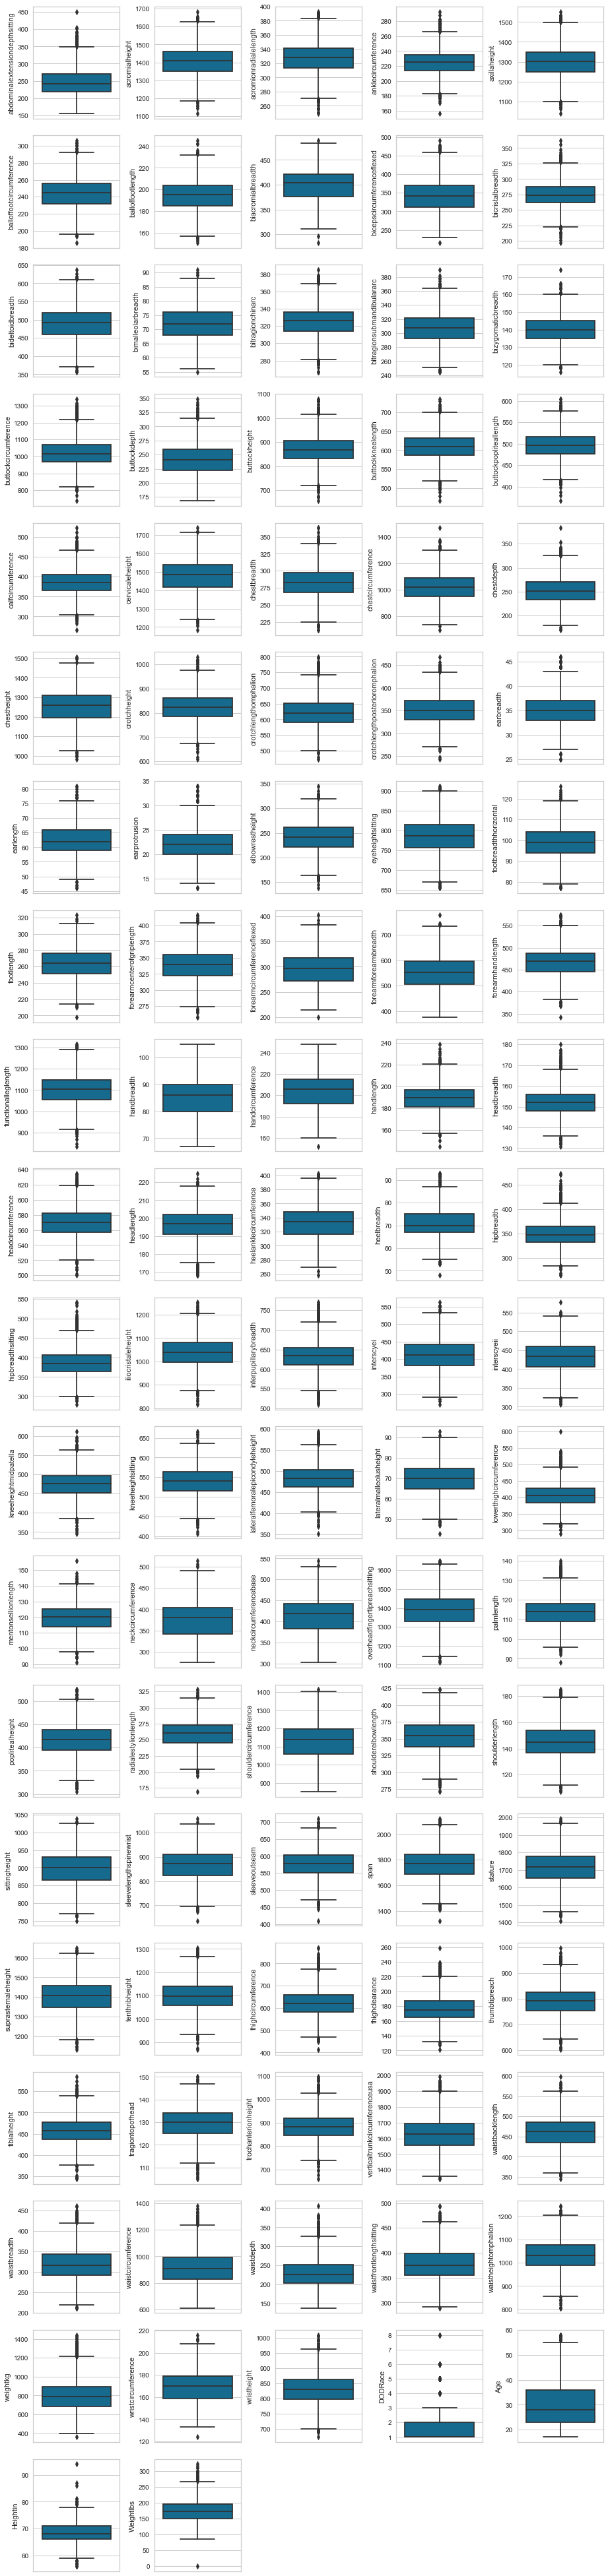

In [214]:
fig = plt.figure(figsize=(15, 30))
plt.subplots_adjust(
    left=0.1, right=0.9,
    top=1.9, bottom=0.1,
    wspace=0.4, hspace=0.15
)
for i, col in enumerate(df_numeric.columns):
    plt.subplot(int(np.ceil(len(df_numeric.columns)/5)), 5, i+1)
    sns.boxplot(y=col, data=df_numeric);

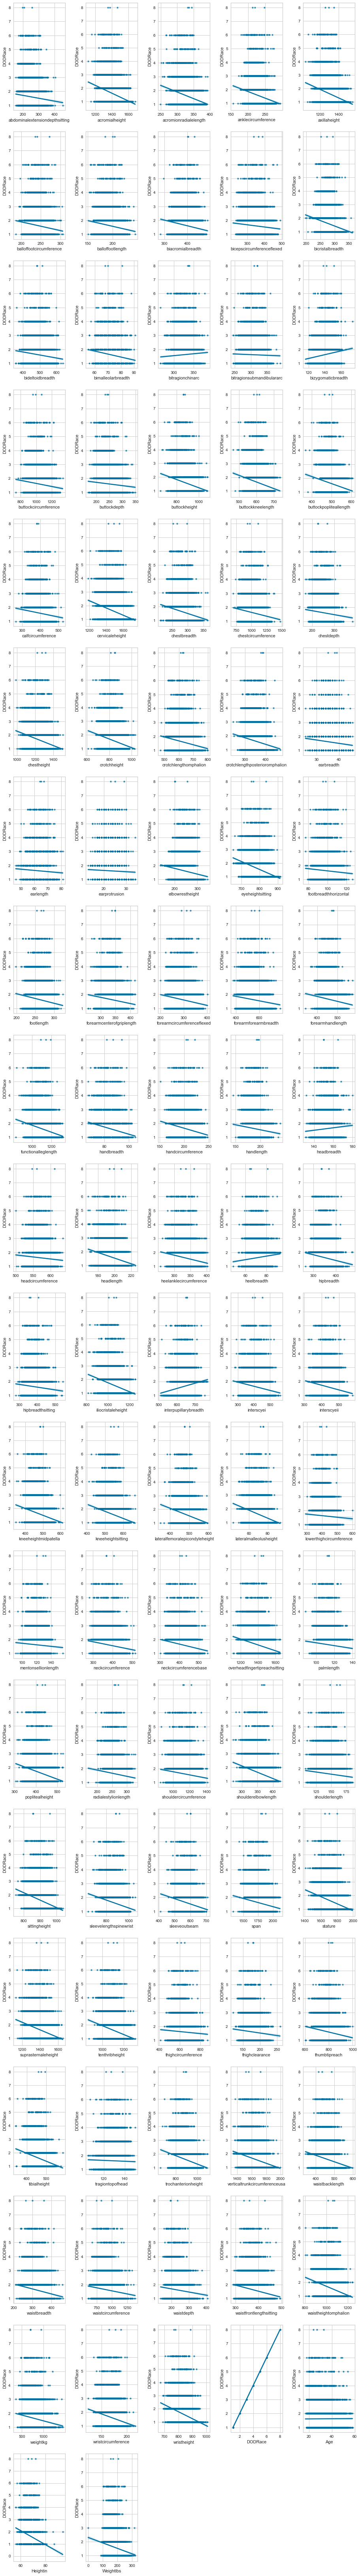

In [215]:
fig = plt.figure(figsize=(15,50))
plt.subplots_adjust(
    left=0.1, right=0.9,
    top=1.9, bottom=0.1,
    wspace=0.4, hspace=0.2
)
for i, col in enumerate(df_numeric.columns):
    plt.subplot(int(np.ceil(len(df_numeric.columns)/5)), 5, i+1)
    sns.regplot(x=col, y="DODRace", data=df_numeric, scatter_kws={"s": 18});

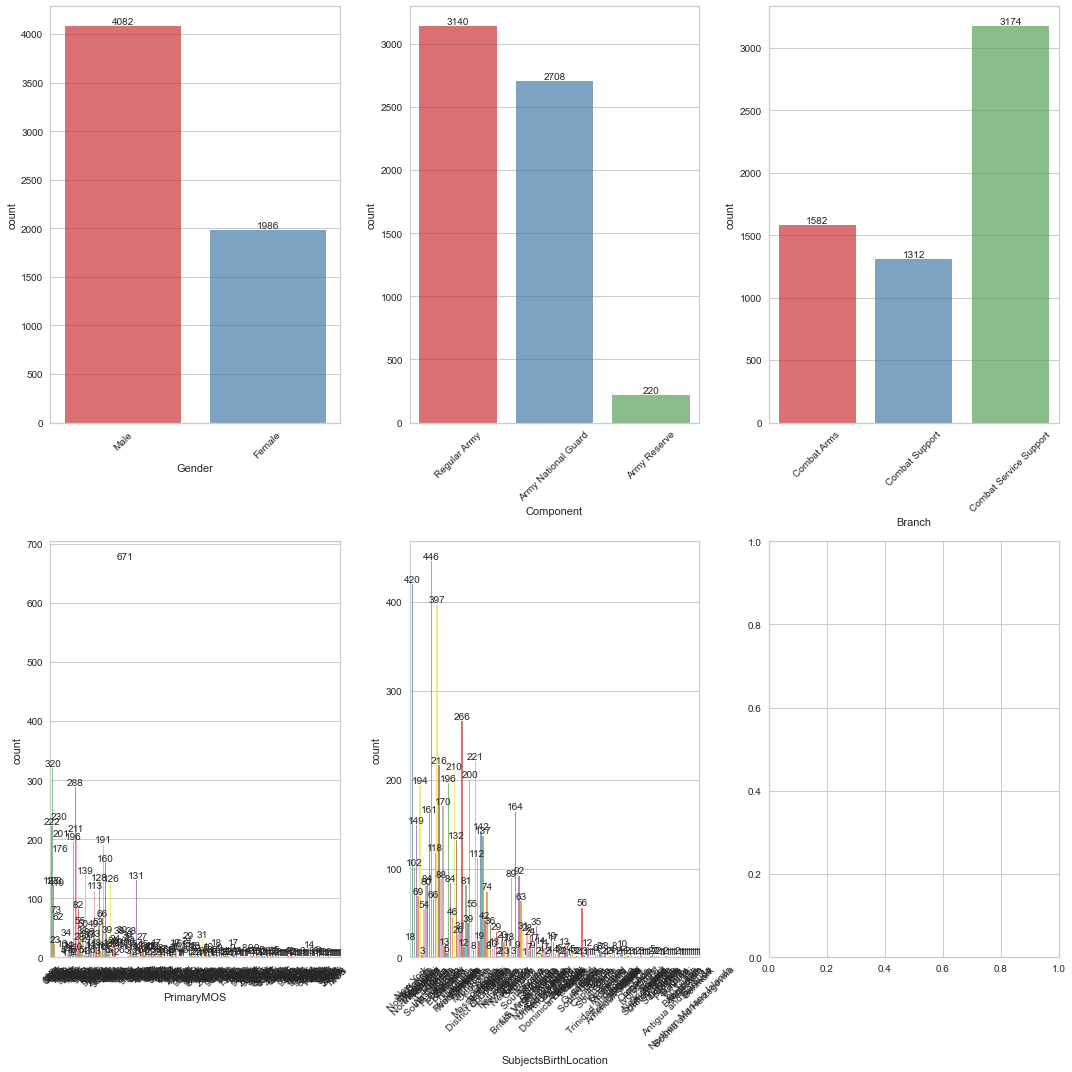

In [216]:
fig, axes = plt.subplots(int(np.ceil(len(df_object.columns)/3)), 3, figsize=(15, 15))

for i, ax in enumerate(fig.axes):
    # plot barplot of each feature skip target
    if i < len(df_object.columns) - 1:
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        g = sns.countplot(x=df_object.columns[i], alpha=0.7, data=df_object, ax=ax, palette = "Set1")
        g.bar_label(g.containers[0])
fig.tight_layout();

In [217]:
df.groupby("DODRace").PrimaryMOS.value_counts().head(50)

DODRace  PrimaryMOS
1        11B           500
         88M           197
         91B           159
         68W           152
         31B           150
         25U           107
         92A           103
         12B            99
         19D            98
         25B            98
         35D            98
         92Y            97
         13B            93
         35M            81
         42A            79
         25Q            75
         74D            66
         25S            60
         35F            60
         92F            55
         92G            52
         91D            44
         19K            42
         11C            37
         25N            37
         11A            34
         25A            30
         13F            28
         12N            27
         13D            25
         25L            23
         94F            21
         35G            20
         91A            20
         91C            20
         94E            20
        

In [218]:
df.groupby("DODRace").SubjectsBirthLocation.value_counts()

DODRace  SubjectsBirthLocation
1        New York                 263
         California               246
         Indiana                  229
         Texas                    212
         Oklahoma                 183
                                 ... 
6        North Carolina             1
         Virginia                   1
8        Arizona                    1
         Guyana                     1
         Oregon                     1
Name: SubjectsBirthLocation, Length: 315, dtype: int64

In [219]:
df.SubjectsBirthLocation.unique()

array(['North Dakota', 'New York', 'Wisconsin', 'North Carolina',
       'Kentucky', 'Mississippi', 'Romania', 'Arkansas', 'Maryland',
       'Arizona', 'South Carolina', 'California', 'Washington',
       'Virginia', 'Texas', 'Illinois', 'Puerto Rico', 'Georgia',
       'Colombia', 'El Salvador', 'Michigan', 'Missouri', 'Philippines',
       'Florida', 'Pennsylvania', 'West Virginia', 'Nebraska', 'Indiana',
       'Montana', 'Colorado', 'Mexico', 'Minnesota', 'Iowa', 'Peru',
       'Oklahoma', 'Massachusetts', 'District of Columbia', 'Ohio',
       'Louisiana', 'Oregon', 'Tennessee', 'Alaska', 'Connecticut',
       'Guam', 'Vietnam', 'Hawaii', 'Netherlands', 'Taiwan', 'Idaho',
       'New Mexico', 'Belgium', 'Japan', 'Maine', 'New Jersey', 'Morocco',
       'Alabama', 'Canada', 'Germany', 'Kansas', 'South Korea',
       'British Virgin Islands', 'Utah', 'US Virgin Islands', 'Nevada',
       'Guyana', 'Delaware', 'Jamaica', 'Cameroon', 'New Hampshire',
       'Nicaragua', 'United Kingd

In [220]:
df.columns

Index(['abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed', 'bicristalbreadth',
       ...
       'Gender', 'Component', 'Branch', 'PrimaryMOS', 'SubjectsBirthLocation',
       'DODRace', 'Age', 'Heightin', 'Weightlbs', 'WritingPreference'],
      dtype='object', length=103)

In [221]:
df.drop(columns=["PrimaryMOS","SubjectsBirthLocation"], inplace=True)

In [222]:
df.shape

(6068, 101)

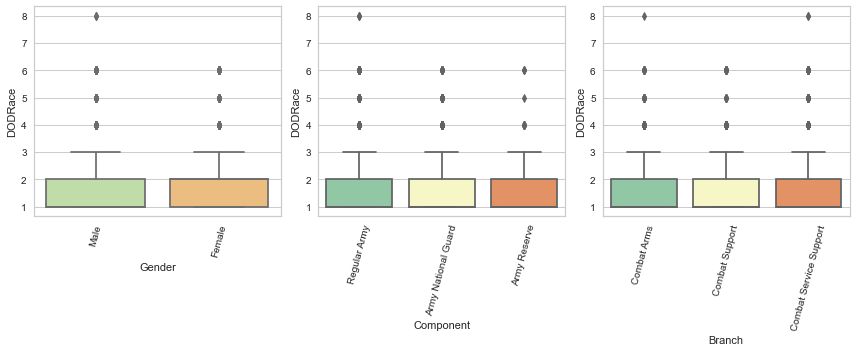

In [223]:
df_object= df.select_dtypes(include="O")
fig, axes = plt.subplots(1, 3, figsize=(12, 5))
for i, ax in enumerate(fig.axes):
    # plot the variation of price in each feature skip target
    if i < len(df_object.columns) - 1:
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=75)
        sns.boxplot(x=df_object.columns[i], y=df["DODRace"], data=df_object, ax=ax, palette="Spectral_r")
fig.tight_layout()

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

## Train-Test split

In [224]:
df.shape

(6068, 101)

In [225]:
X = df.drop(columns="DODRace")
y = df["DODRace"]

In [226]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [227]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4854, 100), (1214, 100), (4854,), (1214,))

## OneHotEncoding operations

In [228]:
from sklearn.preprocessing import OneHotEncoder

### OneHotEncoder for X_train and X_test

In [229]:
def trans_2_OneHotEncoder(X_train, X_test):
    
    cat = X_train.select_dtypes("object").columns.to_list()    
    enc = OneHotEncoder(handle_unknown="ignore", sparse=False)
    
    X_train_cat = pd.DataFrame(enc.fit_transform(X_train[cat]), index = X_train.index, 
                           columns = enc.get_feature_names_out(cat))    
    X_test_cat  = pd.DataFrame(enc.transform(X_test[cat]), index = X_test.index, 
                               columns = enc.get_feature_names_out(cat))
    
    X_train = X_train_cat.join(X_train.select_dtypes("number"))
    X_test = X_test_cat.join(X_test.select_dtypes("number"))
        
    return X_train, X_test

In [230]:
X_train, X_test = trans_2_OneHotEncoder(X_train, X_test)

In [231]:
X_train.shape, X_test.shape

((4854, 107), (1214, 107))

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

### Logistic Model GridsearchCV

## 2. SVC

### Vanilla SVC model 

###  SVC Model GridsearchCV

## 3. RF

### Vanilla RF Model

### RF Model GridsearchCV

## 4. XGBoost

### Vanilla XGBoost Model

### XGBoost Model GridsearchCV

---
---

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [ ]:
!pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

## SVC Over/Under Sampling

## Xgboost Over/ Under Sampling

- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [ ]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, y_pred)

0.7380728719663084

In [ ]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

0.7376215262514891

#  SHAP

https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

In [ ]:
# !pip install shap

  Attempting uninstall: packaging
    Found existing installation: packaging 20.9
    Uninstalling packaging-20.9:
      Successfully uninstalled packaging-20.9


In [ ]:
import shap
explainer = shap.Explainer(log_model,X_train)
start_index = 203
end_index = 204
shap_values = explainer.shap_values(X_test[start_index:end_index])

In [ ]:
shap_values

In [ ]:
print(shap_values[0].shape)

(1, 232)


In [ ]:
# %% >> Visualize local predictions
shap.initjs()
# Force plot
prediction = log_model.predict(X_test[start_index:end_index])[0]
print(f"The log_model predicted: {prediction}")
shap.force_plot(explainer.expected_value[1],
                shap_values[1],
                X_test[start_index:end_index], # for values
                feature_names= X.columns,) 

In [ ]:
shap.summary_plot(shap_values, X_train,max_display=300,feature_names = X.columns)

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___